# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [97]:
import numpy as np
from glob import glob
from PIL import Image

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


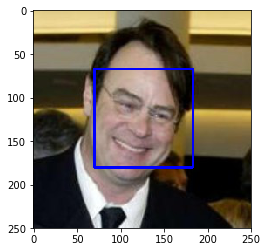

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detectoraaaa
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
My face_detector_test returns the following:
    98/100 human faces detected in human_files_short 
    and 17/100 human faces detected in dog_files_short.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def face_detector_test(images):
    humans_in_images = 0
    for image in images:
        if face_detector(image) == True:
            humans_in_images += 1
    return 100. * float(humans_in_images) / len(images) 

In [7]:
face_detector_test(dog_files_short)

17.0

In [9]:
face_detector_test(human_files_short)

98.0

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :). 

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 98749823.75it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [84]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    '''Resources used for research:
    https://pytorch.org/docs/stable/torchvision/models.html
    https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
    https://discuss.pytorch.org/t/how-to-classify-single-image-using-loaded-net/1411/20
    http://blog.outcome.io/pytorch-quick-start-classifying-an-image/
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    img_pil = Image.open(img_path)
    img_tensor = preprocess(img_pil)
    image = img_tensor.unsqueeze_(0)
    if use_cuda:
        image = image.cuda()
    fc_out = VGG16(image)
    fc_out = fc_out.cpu()
    output = fc_out.detach().numpy()
    
    ## Return the *index* of the predicted class for that image
    predicted_class = output.argmax()

    return predicted_class

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [80]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    if prediction > 150 and prediction < 269:
        return True
    else:
        return False

In [8]:
#Testing dog detector on 1 image
dog_detector("./dog_images/test/001.Affenpinscher/Affenpinscher_00003.jpg")

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ According to the tests below, my VGG16-based dog_detector is 100% accurate on images of dogs and 99% accurate on images of humans.


In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detector_test(images):
    dogs_in_images = 0
    for image in images:
        if dog_detector(image) == True:
            dogs_in_images += 1
    return 100. * float(dogs_in_images) / len(images) 

In [10]:
dog_detector_test(dog_files_short)

100.0

In [11]:
dog_detector_test(human_files_short)

1.0

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

## Specify appropriate transforms, and batch_sizes
data_dir = 'dog_images'

num_workers = 0
batch_size = 20
valid_size = 0.2

transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])

### TODO: Write data loaders for training, validation, and test sets
train_data = datasets.ImageFolder(data_dir + '/train', transform=transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)

class_names = train_data.classes

In [18]:
print('Num training images: ', len(trainloader))
print('Num validation images: ', len(validloader))
print('Num test images: ', len(testloader))

Num training images:  334
Num validation images:  42
Num test images:  42


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I'm doing a basic resize (I believe this will stretch/scale the image to match the desired dimensions) with center crop.
I did not augment the dataset with flips and rotations because I reviewed some of the testing images and they appear to be centered.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 2, padding=1)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc1_bn = nn.BatchNorm1d(500)
        self.fc2 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.elu(self.conv1(x)))
        x = self.pool(F.elu(self.conv2(x)))
        x = self.pool(self.conv3_bn(F.elu(self.conv3(x))))
        x = x.view(-1, 64 * 28 * 28)
        x = self.dropout(x)
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ First, I was trying a simple architecuture with two hidden convolutional layers a fully connected layer at the end, using maxpooling and dropout. In past experience, I've had good results with image classification using only two hidden layers and I wanted to try that first. Working on my code, I looked at the CNNs for CFAR Image Classification notebook and my flower image classification project from phase one of the Pytorch sccholarship challenge. As I was trying to figure out how to describe my convolutional layers, I looked through the code in CNN augmentation and noticed that the solution code used 3 convolutional layers, two fully connected layers at the end, and reserved dropout for the end. So I decided to try that architecture, because if that many layers were needed to distinguish only 10 classes, less layers is probably not enough to dsitinguish 133 classes. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

In [9]:
# from: https://knowledge.udacity.com/questions/17710 to solve an error message in the training loop.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    if use_cuda:
        model = model.cuda()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(trainloader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))


            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(validloader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))


            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased from {:.6f} to {:.6f}. Saving model... '.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(10, [trainloader, validloader, testloader], model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 14858.689453 	Validation Loss: 1750.332031
Validation loss decreased from inf to 1750.332031. Saving model... 
Epoch: 2 	Training Loss: 13464.536133 	Validation Loss: 1672.577637
Validation loss decreased from 1750.332031 to 1672.577637. Saving model... 
Epoch: 3 	Training Loss: 11518.483398 	Validation Loss: 1656.928101
Validation loss decreased from 1672.577637 to 1656.928101. Saving model... 
Epoch: 4 	Training Loss: 7414.735840 	Validation Loss: 1689.491577
Epoch: 5 	Training Loss: 2053.049072 	Validation Loss: 1777.399780
Epoch: 6 	Training Loss: 304.732574 	Validation Loss: 1787.025269
Epoch: 7 	Training Loss: 119.356186 	Validation Loss: 1807.159424
Epoch: 8 	Training Loss: 85.665161 	Validation Loss: 1755.861816
Epoch: 9 	Training Loss: 53.023113 	Validation Loss: 1764.431030
Epoch: 10 	Training Loss: 56.999752 	Validation Loss: 1807.271362


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [57]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(testloader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(testloader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.886056


Test Accuracy: 12% (102/836)


Note: My training and validation loss look odd, and I'm sure I could improve this model by trying to figure out what's causing that - and then by running for more epochs (I only ran for 10). Also, my preious reviewer mentioned compression, which I could add. However, since I lost time in Step 3 and this model has acheived 12% test accuracy, I've decided to move forward to Step 4.

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## TODO: Specify data loaders
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


## Specify appropriate transforms, and batch_sizes
data_dir = 'dog_images'

num_workers = 0
batch_size = 20
valid_size = 0.2

transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])

### TODO: Write data loaders for training, validation, and test sets
train_data = datasets.ImageFolder(data_dir + '/train', transform=transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=transforms)
data_transfer = {"train" : train_data, "valid" : valid_data, "test" : test_data}

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)


In [15]:
print('Num training images: ', len(trainloader))
print('Num validation images: ', len(validloader))
print('Num test images: ', len(testloader))

Num training images:  334
Num validation images:  42
Num test images:  42


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [ ]:
## TODO: Specify model architecture 

In [11]:
##Option 2: Based on DLND transfer learning video lessons
import torchvision.models as models
import torch.nn as nn
from collections import OrderedDict

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I tried two different ways of writing the architecture, as well as two different optimizers, and ran each combo for a few epochs before choosing the one that performed best.
Option 1 w/ SGD after 3 ephochs: Training Loss: 2168.425781; Validation Loss: 348.812622 - Test Loss: 0.821020; Test Accuracy: 75% (635/836) ---
Option 1 w/ Adam: Training loss 30440; validation loss 1978 after first ephoch (started much worse) - I interupted it. ---
Option 2 w/ Adam: performed just as badly as option 1 w/ Adam ---
Option 2 w/ SGD: immediately started better than the previous options. After 2 epochs it had Training Loss: 1751.247070; Validation Loss: 178.599716. (On epoch 3, the valid loss increased so the model wasn't saved.) After 2 epochs, test accuracy was 84% (705/836). This was definitely my model. Because it was training very slowly, I decided to work through the rest of the notebook at 84% accuracy and save that. I can always return and train for longer to get a more accurate network.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [12]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(filter(lambda p: p.requires_grad, model_transfer.parameters()), lr=0.01)

In [ ]:
# Above filter parameter found at: https://github.com/pytorch/pytorch/issues/679
# To solve the follwing error message: ValueError: optimizing a parameter that doesn't require gradients

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [47]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    if use_cuda:
        model = model.cuda()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(trainloader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))


            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(validloader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))


            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased from {:.6f} to {:.6f}. Saving model... '.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [48]:
# train the model
model_transfer = train(3, [trainloader, validloader, testloader], model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3307.475098 	Validation Loss: 243.575806
Validation loss decreased from inf to 243.575806. Saving model... 
Epoch: 2 	Training Loss: 1751.247070 	Validation Loss: 178.599716
Validation loss decreased from 243.575806 to 178.599716. Saving model... 
Epoch: 3 	Training Loss: 1074.374268 	Validation Loss: 213.087723


In [13]:
##This cell exists so I don't have to run the training loop to load the saved model; should have put those in seperate cells
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(testloader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [50]:
test(testloader, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.522467


Test Accuracy: 84% (705/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [18]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
print(len(class_names))

133


In [68]:
from torchvision import transforms
def predict_breed_transfer(img_path):
    transform = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
    image_pil = Image.open(img_path)
    img_tensor = transform(image_pil)
    image = img_tensor.unsqueeze_(0)
    if use_cuda:
        image = image.cuda()
    prediction = model_transfer(image)
    
    breed_class = prediction.argmax()
    
    breed = class_names[breed_class]

    return breed

In [69]:
#Testing...
predict_breed_transfer("./dog_images/test/002.Afghan_hound/Afghan_hound_00125.jpg")

'Afghan hound'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [120]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from pylab import imread,subplot,imshow,show
import matplotlib.pyplot as plt

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = imread(img_path)
    plt.imshow(image)
    if dog_detector(img_path) == True:
        print("Dog detected!")
        breed = predict_breed_transfer(img_path)
        print("Breed is " + breed + ".")
    elif face_detector == True:
        print("Hello, human!")
        breed = predict_breed_transfer(img_path)
        print("You resemble a " + breed + "!")
    else:
        print("I detect neither a dog nor a human in this image.")

    


Dog detected!
Breed is Afghan hound.


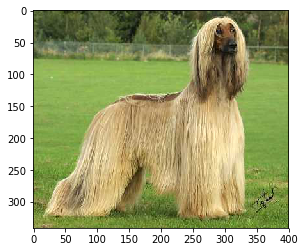

In [121]:
#Testing...
run_app("./dog_images/test/002.Afghan_hound/Afghan_hound_00125.jpg")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The results were worse than I expected, however, the biggest issue seemed to be with the face_detector. I also had an issue with how my run_app algorithm was printing images (it seemed to print them at the end, even though that line of code is at the begginning. I'm not sure why. Most important points of improvement: 1. Make face_detector more accurate. 2. Get run_app to print each image as it iterates through. 3. Train my model_transfer to get more accuracy in predicting breed. However, I will say that even having only been trained for 2 epochs, the breed predictions seem quite good - it recognized a german shepard and thought pugs were french bullogs, which is an understandable mistake.

I detect neither a dog nor a human in this image.


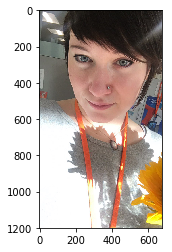

In [128]:
run_app("./test_images/bestie1.jpg")

I detect neither a dog nor a human in this image.


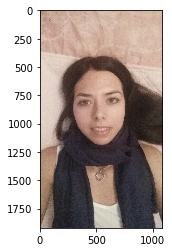

In [131]:
run_app("./test_images/layla1.jpg")

I detect neither a dog nor a human in this image.


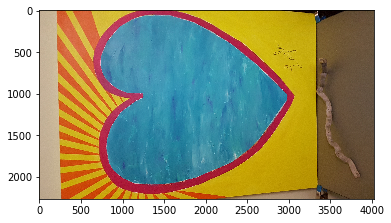

In [137]:
run_app("./test_images/definitely_neither.jpg")

Dog detected!
Breed is French bulldog.


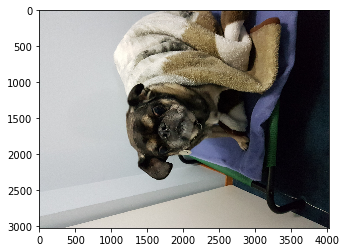

In [138]:
run_app("./test_images/osc.jpg")

I detect neither a dog nor a human in this image.


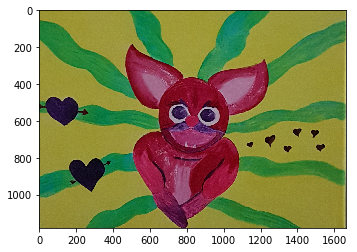

In [139]:
run_app("./test_images/painting.jpg")

I detect neither a dog nor a human in this image.


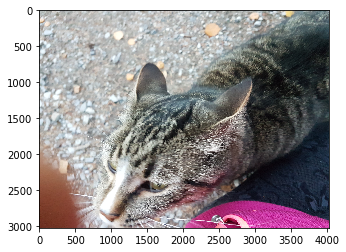

In [141]:
run_app("./test_images/random_cat.jpg")

I detect neither a dog nor a human in this image.


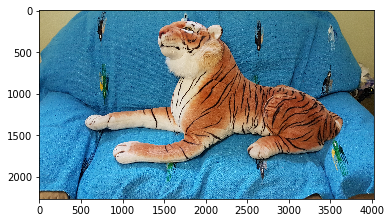

In [142]:
run_app("./test_images/stuffy.jpg")

Dog detected!
Breed is French bulldog.


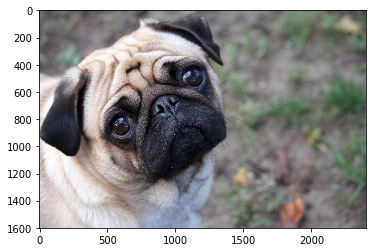

In [143]:
run_app("./test_images/pug1.jpg")

Dog detected!
Breed is German shepherd dog.


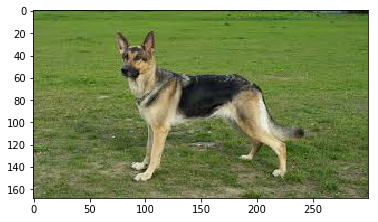

In [144]:
run_app("./test_images/gs.jpeg")

Dog detected!
Breed is Greyhound.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.
I detect neither a dog nor a human in this image.


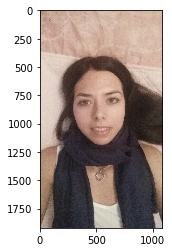

In [135]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
test_images = np.array(glob("./test_images/*"))
## suggested code, below
for file in test_images:
    run_app(file)

Note: for some reason when I ran the above loop, it didn't print out each image, so I ran each test image seperately (above).

run_app didn't work for humans, so I'm getting the breeds directly from breed_predict_transfer

In [146]:
def human_app(img_path):
    print("Hello, human!")
    image = imread(img_path)
    plt.imshow(image)
    breed = predict_breed_transfer(img_path)
    print("You resemble a " + breed + "!")

Hello, human!
You resemble a American water spaniel!


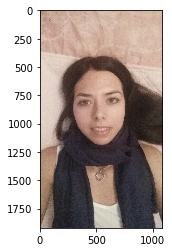

In [147]:
human_app("./test_images/layla1.jpg")

Hello, human!
You resemble a Brittany!


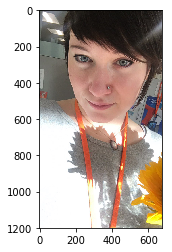

In [148]:
human_app("./test_images/bestie1.jpg")